<a href="https://colab.research.google.com/github/punitvara/ml-practice-notebook/blob/master/ML2019HW01_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Home Assignment No. 1: Part 1 (Practice)
To solve this task, you will write a lot of code to try several machine learning methods for classification and regression.
* You are **HIGHLY RECOMMENDED** to read relevant documentation, e.g. for [python](https://docs.python.org/3/), [numpy](https://docs.scipy.org/doc/numpy/reference/), [matlpotlib](https://matplotlib.org/) and [sklearn](https://scikit-learn.org/stable/). Also remember that seminars, lecture slides, [Google](http://google.com) and [StackOverflow](https://stackoverflow.com/) are your close friends during this course (and, probably, whole life?).

* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of your own code. There exists a class/method for almost everything you can imagine (related to this homework).

* To do this part of homework, you have to write **CODE** directly inside specified places inside notebook **CELLS**.

* In some problems you are asked to provide short discussion of the results. In these cases you have to create **MARKDOWN** cell with your comments right after the corresponding code cell.

* For every separate problem you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**. So make sure that you did everything required in the task

* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e. if the reviewer decides to execute all, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest to fix random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include neccessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.

* Many `sklearn` algorithms support multithreading (Ensemble Methods, Cross-Validation, etc.). Check if the particular algorithm has `n_jobs` parameters and set it to `-1` to use all the cores.

To begin with, let's import the essential (for this assignment) libraries.

In [0]:
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd

from sklearn.datasets import make_moons, make_circles

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
#!pip install mlxtend
### BEGIN Your imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.gridspec as gridspec
import itertools
from mlxtend.plotting import plot_decision_regions
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PolynomialFeatures
from sklearn.random_projection import GaussianRandomProjection
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
import time
### END Your imports

## Task 1. Numpy Problem 1

Write a function, which takes a matrix `arr` and centers each of its columns
by the mean within that column. Check [this](https://docs.scipy.org/doc/numpy/reference/routines.statistics.html)
out for documentation.

In [0]:
def center(arr):
    """Center each column of a matrix by the mean value in that column.

    Parameters
    ----------
    arr : array, shape = (n_rows, n_cols)
        The matrix, the columns of which to center.

    Returns
    ----------
    out : array, shape = (n_rows, n_cols)
        The final column-centered matrix.
    """
    assert arr.ndim == 2
    n_rows, n_cols = arr.shape

    ### BEGIN Solution
    #get the mean value for column
    arr_mean = np.mean(arr,axis=0)
    #create dummy array with original array shape
    out = np.zeros(arr.shape)
    for i in range(arr.shape[1]):
        out[:,i] = arr[:,i] - arr_mean[i]
    ### END Solution

    return out

In [0]:
a=np.array([[1,2],[3,4]])

men = (np.mean(a, axis=0))

for i in range(a.shape[1]):
  a[::,i] = a[:,i] - men[i].T


## Task 2. Numpy Problem 2 

Plot the **Butterfly Curve** given by the following equation:
$$x(t)=\sin(t)\cdot\big[e^{\cos(t)}-2\cos(4t)-\sin^{5}(\frac{t}{12})\big]$$
$$y(t)=\cos(t)\cdot\big[e^{\cos(t)}-2\cos(4t)-\sin^{5}(\frac{t}{12})\big]$$
for $0\leq t\leq 12\pi$. Make sure that all the folds of the wings of different levels have different color.

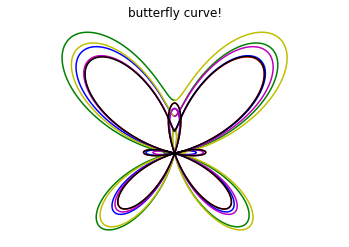

In [0]:
### BEGIN Solution
def fun(start, end):
    t = np.linspace(start, end, 1000)
    x1 = np.exp(np.cos(t))
    x = np.sin(t)*(x1 - (2*np.cos(4*t) - np.sin(t/12)**5))
    y = np.cos(t)*(x1 - (2*np.cos(4*t) - np.sin(t/12)**5))  
    return x, y
start = 0
end =2*np.pi
x = []
y = []
for i in range(6):
  x1 , y1 = fun(start, end)
  x.append(x1)
  y.append(y1)
  start = start + 2* np.pi
  end = end + 2* np.pi

color = ['r', 'b', 'g', 'y', 'm', 'k']
for i in range(6):
  plt.plot(x[i], y[i], c= color[i])

plt.title('butterfly curve!')
plt.axis('equal')
plt.axis('off')
plt.show()

### END Solution

## Task 3. Matplotlib (2 points)

Plot the level sets of the $l^p$ norm (actually, this is not a norm for $p<1$)
\begin{equation}
    \|z\|_p = \biggl(\sum_i \lvert x_i\rvert^p\biggr)^\tfrac1{p}
        \,,
\end{equation}
and make the contour of the unit ball in $l^p$ norm stand out. Draw plots
for $p \in \{0, \tfrac1{25}, \tfrac12, 1, 1.5, 2, 7, \infty\}$.

Study plotting examples on [this](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contourf.html#matplotlib.pyplot.contourf) and [this](http://scikit-learn.org/stable/auto_examples/svm/plot_oneclass.html) pages (**especially the last one**) and have a look at these functions: *np.meshgrid*, *np.linspace* in numpy's documentation. We suggest to use `np.linalg.norm`.

Try to produce a plot that **looks like the one below**:

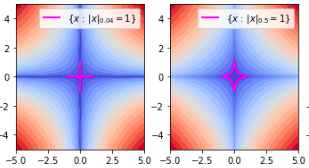

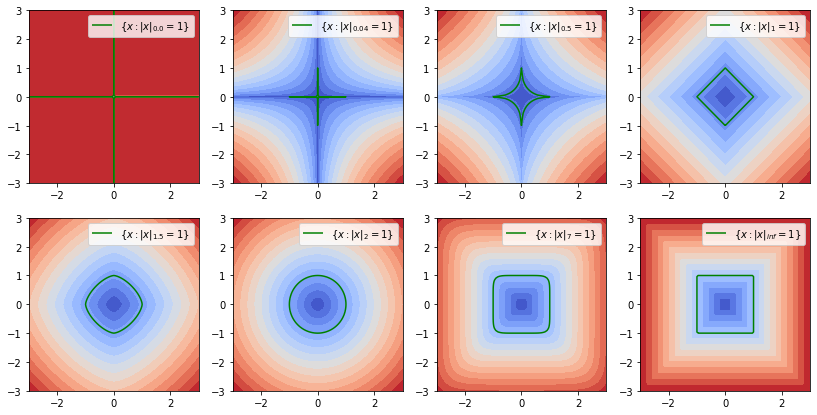

In [0]:
p_values = [0., 0.04, 0.5, 1, 1.5, 2, 7, np.inf]
xx, yy = np.meshgrid(np.linspace(-3, 3, num=101),
                     np.linspace(-3, 3, num=101))

fig, axes = plt.subplots(ncols=(len(p_values) + 1)// 2,
                         nrows=2, figsize=(14, 7))

for p, ax in zip(p_values, axes.flat):
    ### BEGIN Solution
    #join sequence of array and get norm 
    z = np.linalg.norm(np.stack((xx,yy)),ord=p,axis=0)
    plt.subplot(ax)
    plt.contourf(xx, yy, z, levels=18, cmap='coolwarm')
    uball = plt.contour(xx,yy,z, levels=[1], colors='green')
    label = '{$x: |x|_{'+ '{}'.format(str(p)) + '} = 1$}'
    plt.legend([uball.collections[0]],[label])
    
    ### END Solution

plt.show()

## Task 4. Decision Rules and Feature Engeneering (1+1=2 points)

In this task, your goal is to visualize the decision rules of several classifiers applied to artificial $2$-dimensional dataset generated by builtin `sklearn.datasets` method called `make_moons`. In the cell below we generate the dataset.

In [0]:
def make_sunny_moons(n_sun=50, n_moons=100, noise=0.0, sun_radius=1.9, theta=None):
    X_moons, y_moons = make_moons(n_samples=n_moons, noise=noise)
    if not n_sun:
        return X_moons, y_moons
    
    np.random.seed(0xBEEFBAD)
    angles = np.arange(0, 2 * np.pi, 2 * np.pi / n_sun)
    X_sun = sun_radius * np.column_stack([np.cos(angles), np.sin(angles)]) + np.array([0.5, 0.25])
    X_sun += np.random.normal(scale=noise, size=X_sun.shape)
    y_sun = 2 * np.ones(n_sun)
    
    X = np.vstack([X_moons, X_sun])
    y = np.concatenate([y_moons, y_sun]).astype(int)
    X -= X.mean(axis=0)
    
    if theta is None:
        theta = np.pi / 4
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c,-s), (s, c)))
    X = X @ R
    
    return X, y

X, y = make_sunny_moons(n_sun=150, n_moons=300, noise=0.15)

### Subproblem 4.1. Decision Rule Plotting (1 of 2 points)

The goal of the subproblem is to fit the following classifiers on features `X` to target `y`:
* Decision Tree (single!) with small depth ($\leq 4$);
* Random Forest with small number of trees ($\leq 25$) of small depth ($\leq 4$);
* Logistic Regreesion;
* Support Vector Machine with RBF kernel;
* Gaussian Naive Bayes;
* k-Nearest Neighbor Classifier with small number of neighbors (e.g. $3$);

For all the fitted classifiers you have to plot the decision regions (the example is shown below the cell). Each plot must have **Title** which contains name of the classifier and its accuracy (only **two** decimal places) on the data.

You can write the plotting code on your own, but we highly recommend just to use `mlxtend` library (`pip install mlxtend` in linux terminal), which has awesome one-line decision rule plotting function (you are to [google](http://google.com) it).

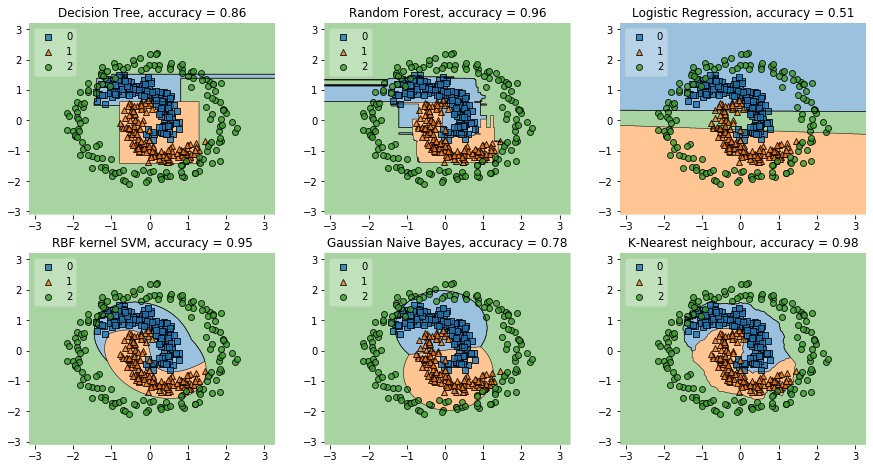

In [0]:
### BEGIN Solution
classifier1 = DecisionTreeClassifier(max_depth=4)
classifier2 = RandomForestClassifier(n_estimators=25, max_depth=4)
classifier3 = LogisticRegression()
classifier4 = SVC(kernel='rbf')
classifier5 = GaussianNB()
classifier6 = KNeighborsClassifier(n_neighbors=3)

classifier1.fit(X,y)
classifier2.fit(X,y)
classifier3.fit(X,y)
classifier4.fit(X,y)
classifier5.fit(X,y)
classifier6.fit(X,y)
gs = gridspec.GridSpec(3, 3)
fig = plt.figure(figsize=(15, 12))
labels = ['Decision Tree','Random Forest','Logistic Regression',
          'RBF kernel SVM','Gaussian Naive Bayes',
          'K-Nearest neighbour']
count, row, col =0,0,0
for clf, lab in zip([classifier1,classifier2,classifier3,classifier4,classifier5,classifier6],
                         labels):
    clf.fit(X, y)
    count +=1
    ax = plt.subplot(gs[row ,col])
    fig = plot_decision_regions(X=X, y=y,
                                clf=clf, legend=2)
    accuracy = clf.score(X,y)
    plt.title(lab + ', accuracy = '+ str("%.2f")%accuracy)
    row = int(count/3)
    col = count %3
    

### END Solution

### Subproblem 4.2. Pipeline: Fitting to Data by Feature Engeneering 2 points)
In previous task 4.1 several classifiers obviously failed fitting to data. This happend because the decision rule of the classifier has a restricted form (e.g. linear for linear models), while the data is more complicated.

One may try to change the parameters of the classifier (e.g. increase the number of trees in Forest) in order to improve accuracy, but some models (especially linear) do not have parameters that can change the form of the decision rule.

In this case the **feature engeneering** helps: one may try to compute new (e.g. non-linear) features based on the existing pool and fit the classifier in the new features. This may help low-complex classifiers to fit to hard data dependencies.

Your task it to
* Choose **two classifiers** from the previous problem among Decision Tree, Random Forest, Naive Bayes, Logistic Regression;
* By generating of additional features (e.g. polynomial) make them achieve accuracy $>0.95$.
* For each classifier, write 2-3 sentences why did you choose these features.
* Plot their decision rules in the original feature space.

It is your choice how to generate features. You may create hand-crafted featues and add them manually. Nevertheless, we **highly suggest** to get used to and apply the following builtin `sklearn` methods:
* `PolynomialFeatures`, `GaussianRandomProjection` among others - for feature generation
* `StandartScaler`, `MinMaxScaler` among others - for feature scaling
* `Pipeline` - for combining several operations in a row (e.g. feature creation & prediction)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


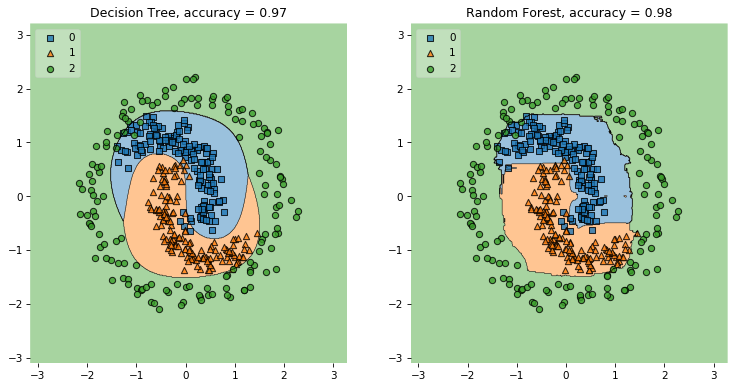

In [0]:
### BEGIN Solution
labels = ['Decision Tree','Random Forest']
#rng = np.random.RandomState(42)
clfs = [
    Pipeline([('scaler', StandardScaler()),('features', PolynomialFeatures(6)),  ('LR', classifier3)]),
    Pipeline([('scaler', StandardScaler()),('features', PolynomialFeatures(6)),  ('RF', RandomForestClassifier(n_estimators=50, max_depth = 5, random_state = 0))]),
]
fig, axes = plt.subplots(ncols=2,
    nrows=1, figsize=(12, 6),
    dpi=75)

for clf, ax, lab in zip(clfs, axes.flat, labels):
    clf.fit(X, y)
    plt.subplot(ax)
    fig = plot_decision_regions(X=X, y=y,
                                clf=clf, legend=2)
    accuracy = clf.score(X,y)
    plt.title(lab + ', accuracy = '+ str("%.2f")%accuracy)
### END Solution

## Task 5. Model Selection 

You are to test Random Forests and Support Vector Machines on a trivial [Tic Tac Toe Endgame Dataset](https://datahub.io/machine-learning/tic-tac-toe-endgame). Let's load it.

In [0]:
data = pd.read_csv('data/tic-tac-toe.csv')
X, y = data.drop('class', axis=1), data['class'].astype(int)
data.sample(3)

,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
718,x,b,o,x,x,o,b,b,o,False
458,o,b,o,x,x,x,x,o,b,True
499,b,x,o,x,x,o,o,x,b,True


The dataset consists of several possible endgame positions of the Tic-Tac-Toe game. The target variable is the victory of `x` player over `o` player (victory or defeat/draw). Since the features are categorical, we simply transform them to real-valued $-1$ for `o`, $1$ for `x` and $0$ for emply cell `b`.

In [0]:
X = X.applymap(lambda v: 1 if v == 'x' else -1 if v == 'o' else 0)
X.sample(4).sort_index()

,TL,TM,TR,ML,MM,MR,BL,BM,BR
193,1,-1,0,1,1,-1,0,-1,1
582,0,-1,0,1,-1,-1,1,1,1
583,0,-1,0,-1,1,-1,1,1,1
819,-1,-1,-1,1,1,0,0,0,1


We are going to test how machine learning algorithms can classify the final game positions into the ones when `x` player won and all others. Everybody knows that for this problem there is a simple decision rule: `x` wins if there are three `x`'s in a row/column/diagonal. But can our cool machine learning tools catch this trivial dependence? In this problem, the class balance is around $2:1$ so we still use accuracy metric.

Intuitively, this rule is logical, i.e. one may expect decision-tree-based algorithm to be the most appropriate for this case. But is that true? In the code below we compare huge Random forest with simple Logistic Regression and SVM with default parameters.

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

np.random.seed(0xBADBEEF)
test_idx = list(np.random.choice(range(len(X)), 650, replace=False))
train_idx = [i for i in range(len(X)) if i not in test_idx]

Note that we will use only $\frac{1}{3}$ of data to train and $\frac{2}{3}$ to test the model.

In [0]:
rf = RandomForestClassifier(n_estimators=400, max_depth=10, random_state=2)
svm = SVC(gamma='auto')
lr = LogisticRegression(solver='lbfgs')
clfs = (rf, svm, lr)

for clf in clfs:
    clf.fit(X.iloc[train_idx], y.iloc[train_idx])
    score = accuracy_score(y.iloc[test_idx], clf.predict(X.iloc[test_idx]))
    name = clf.__class__.__name__
    print(f'{name} scored {round(score, 3)}')

RandomForestClassifier scored 0.932
SVC scored 0.94
LogisticRegression scored 0.972


We see all the models provide reasonable quality. Yet we are not satisfied!

### Subproblem 5.1. Model selection for SVM (1 of 2 points)
Perform **Grid Search** on train set for optimal hyperparameter for SVM model in order to achieve 5-fold validation score on the data not lower than $0.98$. You can code the Grid Search Manually, but we highly encourage yo use builtin `GridSearchCV` method. **Report** the validation accuracy score, test accuracy score and best found hyper parameters. **Explain** the results: does your model overfit?

In [0]:
### BEGIN Solution
param_grid = {'C': [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1000],
              'gamma': [1,0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'linear']}

grid = GridSearchCV(SVC(random_state = 0), param_grid, refit =True, n_jobs=-1)
grid.fit(X,y)
name = grid.__class__.__name__
bst_param = grid.best_params_
score = grid.best_score_
val_score = cross_val_score(grid, X, y,cv=5).mean()
print (val_score)
print(f'{name} for SVM model scored %.3f ' % score)
print(bst_param)
### END Solution

0.9832460732984293
GridSearchCV for SVM model scored 0.983 
{'C': 1, 'gamma': 1, 'kernel': 'linear'}


### Subproblem 5.2. Feature engeneering for Random Forest  (1 of 2 points)
Perform **feature engeneering** for Random Forest with parameters from the example in order to achieve 5-fold validation score on train set not lower than $0.96$. **Write** 2-3 sentences to explicitly explain your motivation for provided feature choice. Fit the model on the whole train set and **provide** the test score. 

In [0]:
### BEGIN Solution
from sklearn.decomposition import PCA
# Projection of original data using dimentionality method (Principal component Analysis) of the data 
#but sticking to same dimension for accuracy 
rng = np.random.RandomState(2)
rf_pipeline = Pipeline([('GR', PCA(n_components=9)),
                ('RF', RandomForestClassifier(n_estimators=200, 
                                              random_state=2))])

rf_pipeline.fit(X,y)
rf_pipeline.score(X, y)
#name = clf.__class__.__name__
val_score = cross_val_score(rf_pipeline, X, y, cv=5).mean()
print(val_score)
### END Solution

0.9811627399650961


## Task 6. Bagging Ensembles of Regressors (2 points)
In this problem, you are to deal with [Concrete Compressive Strength Dataset](https://www.kaggle.com/elikplim/concrete-compressive-strength-data-set). You goal will be to determine the optimal parameters for two Bagging-Based Forest Ensemble **Regressors** and compare the forests. Let's load the data and split it into test and train parts.

In [0]:
data = pd.read_csv('data/concrete.csv').astype(float)
X = data.drop('concrete_compressive_strength', axis=1)
y = data.concrete_compressive_strength

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

data.sample(3).sort_index()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
317,251.8,0.0,99.9,146.1,12.4,1006.0,899.8,56.0,44.14
546,333.0,0.0,0.0,192.0,0.0,931.2,842.6,28.0,31.97
811,310.0,0.0,0.0,192.0,0.0,970.0,850.0,28.0,27.92


Please note that both in Task 4 and Task 5 the whole data was the Train Data. In Task 4 the output score (accuracy) was the **train** score (i.e. the score on the train data of the model fitted on the same data). In task 5 the output score was the **validation score**, i.e. the result of validating the model on the train data.

In this problem, we do a step further and split the whole data into train part (on which we train & validate) and test part (where we compute the final **test** score on the validated model).

In this problem, you are to consider the `RandomForestRegressor` and `ExtraTreesRegressor` models for the prediction of concrete compressive strength under **squared loss function** (mean squared error). Recall that Random Forest was discussed in the lectures. [Extremely Randomized Forest](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.65.7485&rep=rep1&type=pdf) is another bootstraped forest with simple tree building algorithm. Basically, each split of each tree node is chosen at random both w.r.t. feature and threshold (while in random forest the split minimizes impurity).

You have to do the following steps and answer the following questions:
* For both Forests perform the Grid Search (on the train data) over most important algorithm's parameters (what are they?) to determine the optimal hyperparameters.
* For the optimal parameters output the train, validation score and the score for predicting for the test data.
* Compare the obtained scores. Explain, why the scores differ a lot for train and validation/test.
* Which of the algorithms perform better on the training set? Explain why!

**Answers**
* 
* Random Forest regressor performs better in case of training because it splits the attributes deterministically when compare to random split in extremely randomized forest. 

In [0]:
### BEGIN Solution
param_rf = {'n_estimators': [1,2,4,16,32,64,128,256,512],
              'criterion': ['mse','mae'],
              'max_depth' :[2,4,8,None],
              'min_samples_split': [2,4,8]
              }

param_erf = {'n_estimators': [1,2,4,16,64,128,256,512],
              'criterion': ['mse','mae'],
              'max_depth' :[2,4,8,16,None],
              'min_samples_split': [2,4,8]
             }

grid_rf = GridSearchCV(RandomForestRegressor(max_depth=2, random_state=0), param_rf, refit =True, n_jobs=-1,  scoring ='neg_mean_squared_error')
grid_erf = GridSearchCV(ExtraTreesRegressor(random_state = 0), param_erf, refit=True, n_jobs=-1,  scoring ='neg_mean_squared_error')
grid_rf.fit(X_train, y_train)
grid_erf.fit(X_train, y_train)

rf_train = grid_rf.predict(X_train)
rf_test = grid_rf.predict(X_test)

erf_train = grid_erf.predict(X_train)
erf_test = grid_erf.predict(X_train)

rf_valid = -grid_rf.best_score_
erf_valid = -grid_erf.best_score_

rf_score_train = mean_squared_error(y_train, rf_train)
rf_score_test = mean_squared_error(y_test, rf_test)

erf_score_train = mean_squared_error(y_train, rf_train)
erf_score_test = mean_squared_error(y_test, rf_test)

print("Ensemble Classifier\t Train\t Valid\t Test")

print("ExtraTreesRegressor  \t" + "%s\t %s\t %s\t" % (round(rf_score_train,2), round(rf_valid,2), round(rf_score_test,2)))
print("RandomForestRegressor\t" + "%s\t %s\t %s\t" % (round(erf_score_train,2), round(erf_valid,2), round(erf_score_test,2)))
### END Solution

Ensemble Classifier	 Train	 Valid	 Test
ExtraTreesRegressor  	4.57	 27.31	 22.88	
RandomForestRegressor	4.57	 24.97	 22.88	


## Task 7. Multi-Class Classification Strategies (2 points)
In this task, you deal with multiclass classification problem for [Glass Classification Data](https://www.kaggle.com/uciml/glass). Let's load the dataset.

In [0]:
data = pd.read_csv('data/glass.csv')
X, y = data.drop('Type', axis=1), data.Type
data.sample(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
79,1.51590,12.82,3.52,1.90,72.86,0.69,7.97,0.0,0.0,2
87,1.51645,13.40,3.49,1.52,72.65,0.67,8.08,0.0,0.1,2
176,1.51905,14.00,2.39,1.56,72.37,0.00,9.57,0.0,0.0,6


The features of each glass oject correspond to the fraction of the particular chemical element in the object. The target variable corresponds to the type of glass (6 classes).

In this problem, you have to empirically compare the time complexity and performance of several multiclass labeling strategies for different algorithms. You must consider the following algorithms:
* Single Decision Tree (depth 7)
* Medium Random Forest (100 trees of depth 3)
* KNearestNeighbors (5 neighbors)
* Logistic Regression

Note that all these algorithms by default support **multiclass labeling**. Nevertheless, we want you to compare this approach with **OneVSRest** and **OneVSOne** approaches applied to this algorithms. More precisely, for every pair (algorithm, approach) you are to perform 5-fold cross validation on the data and output the validation score and the computation time in the **table** form. Please note that you also have to choose the metric to optimize during CV (e.g. accuracy, balanced accuracy) on your own. 

After that, you are to answer the following questions:
* Which metric did you choose to optimize during cross validation and why? Explain
* For which algorithms the usage of OneVSRest/OneVSOne approach provides significantly better performance without significant increase in computation time?

**Answers**
* Metric choosen for cross validation is balanced accuracy because of class imbalanced(class 1 and class 2 are in large numbers with compare to all other classes)

* OneVsOne performs better for Decision tree classifier when time difference compare to other algos is very less. 

In [0]:
### BEGIN Solution
models = [Pipeline([('standard',StandardScaler()),('LR',LogisticRegression())]),
        Pipeline([('standard',StandardScaler()),('RF',RandomForestClassifier(max_depth=100, random_state = 0))]),                  
        Pipeline([('standard',StandardScaler()),('KNN',KNeighborsClassifier(n_neighbors=5))]),
        Pipeline([('standard',StandardScaler()),('DT',DecisionTreeClassifier(max_depth=7, random_state = 0))])]
model_names = ['LogistiRegression','RandomForest','KNearestNeighbors','DecisisonTree']

score_arr = np.zeros((3,4))
time_arr = np.zeros((3,4))
score_list = list()
time_list = list()
col = 0
for model, model_name in zip(models,model_names):
    row = 0
    modelMC = model    
    #modelMC.fit(X,y)
    start = time.time()
    score = cross_val_score(modelMC,X,y,scoring="balanced_accuracy").mean()
    end = time.time()
    score_list.append(score)
    time_list.append(end-start)
    score_arr[row,col] = score
    time_arr[row,col] = end-start
    
    row += 1
    model1v1 = OneVsOneClassifier(model)
    #model1v1.fit(X,y)
    start = time.time()
    score = cross_val_score(model1v1,X,y,scoring="balanced_accuracy").mean()
    end = time.time()
    score_list.append(score)
    time_list.append(end-start)
    score_arr[row,col] = score
    time_arr[row,col] = end-start
    
    row += 1
    model1vR = OneVsRestClassifier(model)
    #model1vR.fit(X,y)
    start = time.time()
    score = cross_val_score(model1vR,X,y,scoring="balanced_accuracy").mean()
    end = time.time()
    score_list.append(score)
    time_list.append(end-start)
    score_arr[row,col] = score
    time_arr[row,col] = end-start
    
    col += 1
    
index = ['MultiClass', 'OneVsOne', 'OneVsRest']
print("Cross Validation Scores")
score_df = pd.DataFrame(score_arr,columns=model_names,index=index)

time_df = pd.DataFrame(time_arr,columns=model_names,index=index)
display(score_df)
print("Training Duration (CV=5)")
display(time_df)
### END Solution

Cross Validation Scores


,LogistiRegression,RandomForest,KNearestNeighbors,DecisisonTree
MultiClass,0.549127,0.700873,0.574901,0.530198
OneVsOne,0.550337,0.636190,0.526468,0.648433
OneVsRest,0.458909,0.676409,0.606806,0.589921


Training Duration (CV=5)


,LogistiRegression,RandomForest,KNearestNeighbors,DecisisonTree
MultiClass,0.081681,0.666720,0.028922,0.024752
OneVsOne,0.365138,9.546658,0.334075,0.213044
OneVsRest,0.200162,3.814013,0.118553,0.110116
